In [6]:
filePath <- "http://www.statslab.cam.ac.uk/~tw389/teaching/SLP18/data/"
fileName <- "seeds"
seeds <- read.table(paste0(filePath, fileName), header = T)
head(seeds)
seeds <- cbind(seeds , prop = seeds$y/seeds$n)
attach (seeds)
is.factor(seed)
seeds$extract <- as.factor(seeds$extract)
head(seeds)

seed,extract,y,n
A,1,10,39
A,1,23,62
A,1,23,81
A,1,26,51
A,1,17,39
A,2,5,6


[1] TRUE

seed,extract,y,n,prop
A,1,10,39,0.2564103
A,1,23,62,0.3709677
A,1,23,81,0.2839506
A,1,26,51,0.5098039
A,1,17,39,0.4358974
A,2,5,6,0.8333333


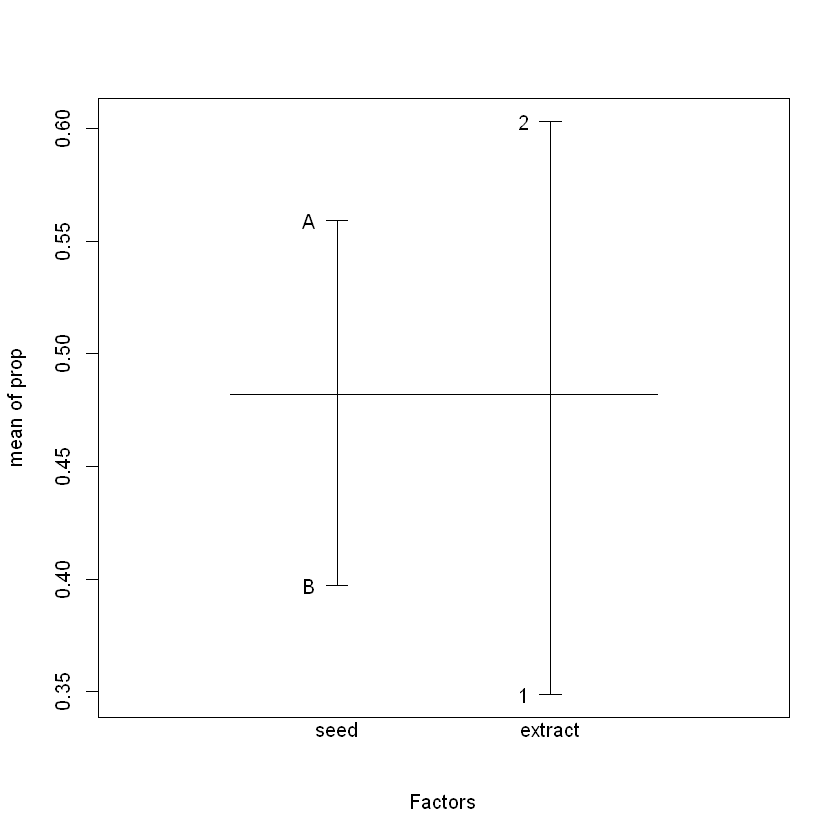

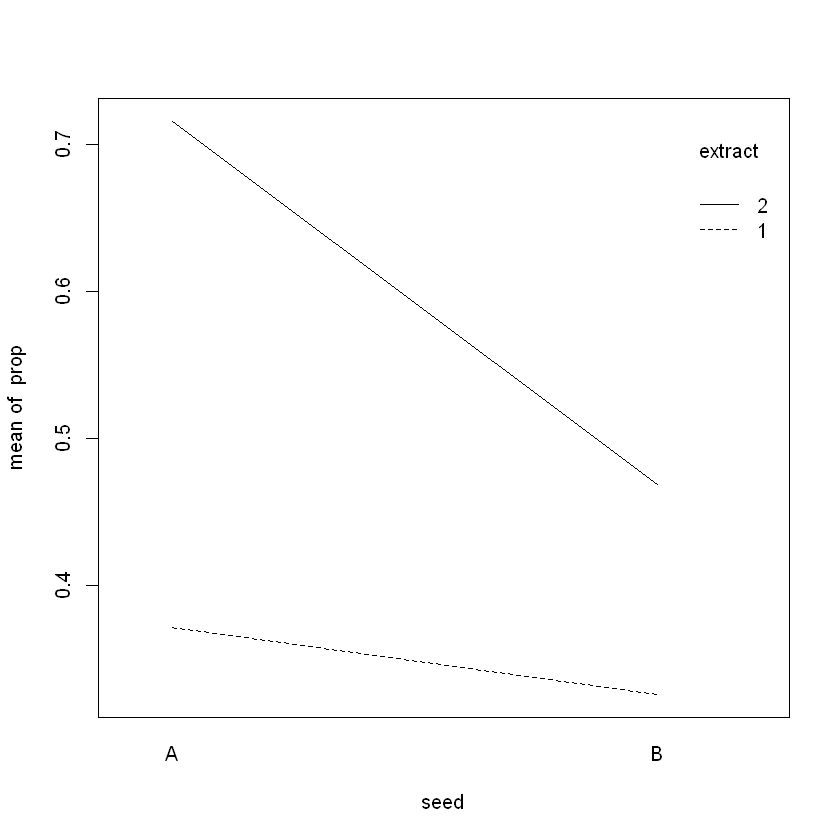

In [9]:
plot.design(prop ~ seed*extract, data=seeds)
interaction.plot(seed, extract, prop)

In [12]:
seed.glm1 <- glm(prop~seed*extract, family=binomial, weights = n, data = seeds)
summary(seed.glm1)


Call:
glm(formula = prop ~ seed * extract, family = binomial, data = seeds, 
    weights = n)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.01617  -1.24398   0.05995   0.84695   2.12123  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.5582     0.1260  -4.429 9.46e-06 ***
seedB            0.1459     0.2232   0.654   0.5132    
extract2         1.3182     0.1775   7.428 1.10e-13 ***
seedB:extract2  -0.7781     0.3064  -2.539   0.0111 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.719  on 20  degrees of freedom
Residual deviance: 33.278  on 17  degrees of freedom
AIC: 117.87

Number of Fisher Scoring iterations: 4


This is fitting the model $n_{ijk}Y_i \sim \text{Bin}(n_{ijk}, p_{ijk})$ and $\text{logit}(\frac{p_{ijk}}{1-p_{ijk}}) = \mu + \alpha_i+\beta_j+\gamma_{ij}$. In this notation, $\alpha_1 = \beta_1 = \gamma_{11} = \gamma_{21} = \gamma_{12} =0$

The high deviance for the 17 degrees of freedom suggests poor fit.

Now lets try some tests.

In [19]:
anova(seed.glm1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,20,98.71946,NA
seed,1,2.544214,19,96.17524,1.106990e-01
extract,1,56.489353,18,39.68589,5.650349e-14
seed:extract,1,6.408104,17,33.27779,1.136007e-02


In [21]:
seed.glm2 <- glm(prop~seed+extract, family=binomial, weights = n, data = seeds)
summary(seed.glm2)


Call:
glm(formula = prop ~ seed + extract, family = binomial, data = seeds, 
    weights = n)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3919  -0.9949  -0.3744   0.9831   2.4766  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.4300     0.1137  -3.781 0.000156 ***
seedB        -0.2705     0.1547  -1.748 0.080435 .  
extract2      1.0647     0.1442   7.383 1.55e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.719  on 20  degrees of freedom
Residual deviance: 39.686  on 18  degrees of freedom
AIC: 122.28

Number of Fisher Scoring iterations: 4


The increase in deviance of around 6 means thatn it is significant according to $\chi^2_1$. Therefore, we reject this simpler model.

Furthernmore, not that this simpler model has a higher AIC. Therefore, the more complicated model is selected.

Now we use various model selection methods to select the optimal model for modelling surgery data.

In [24]:
fileName <- "surgery"
surg <- read.table (paste0(filePath, fileName), header=T)

head(surg)
attach(surg)
sum(death)

age,sex,vas,lnSize,stage,platelet,death
50,M,1,4.25,3,214,1
50,F,0,2.71,2,135,0
51,M,1,2.94,1,270,1
51,M,0,3.50,2,293,0
53,M,1,4.09,3,209,1
54,M,0,2.30,1,182,0


The following objects are masked from surg (pos = 3):

    age, death, lnSize, platelet, sex, stage, vas

The following objects are masked from surg (pos = 4):

    age, death, lnSize, platelet, sex, stage, vas



[1] 15

We shall lump the stages into a two level variable, though it is possible to interpolate between them.

We're using a logistic regressive model -- binomial but with only two classes.

In [27]:
surg.glm1 <- glm(death~age+sex+vas+lnSize+I(stage>=3)+platelet, binomial)
summary(surg.glm1)


Call:
glm(formula = death ~ age + sex + vas + lnSize + I(stage >= 3) + 
    platelet, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7928  -0.5933  -0.2548   0.1471   1.9433  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.790251   6.632857  -0.421   0.6740  
age               -0.093112   0.105252  -0.885   0.3763  
sexM              -0.542891   1.101351  -0.493   0.6221  
vas                0.534318   1.179241   0.453   0.6505  
lnSize             2.247142   1.207833   1.860   0.0628 .
I(stage >= 3)TRUE  3.959408   1.639399   2.415   0.0157 *
platelet          -0.001595   0.007189  -0.222   0.8244  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 52.925  on 39  degrees of freedom
Residual deviance: 26.212  on 33  degrees of freedom
AIC: 40.212

Number of Fisher Scoring iterations: 6


The small dispersion method only works if we have sufficiently large number of trials for each data point -- here, we're dealing with binary data, so that does not hold.

We therefore use AIC and to select a model using forward selection. This starts with an intercept only model and then adds new covariates greedily.

In [30]:
step(glm(death~1, binomial), scope = death ~ age + sex + vas + lnSize + I(stage>=3) + platelet, direction = 'forward', trace =1)

Start:  AIC=54.93
death ~ 1

                Df Deviance    AIC
+ I(stage >= 3)  1   33.364 37.364
+ lnSize         1   37.426 41.426
+ vas            1   47.527 51.527
+ sex            1   49.568 53.568
<none>               52.925 54.925
+ age            1   52.829 56.829
+ platelet       1   52.863 56.863

Step:  AIC=37.36
death ~ I(stage >= 3)

           Df Deviance    AIC
+ lnSize    1   27.278 33.278
<none>          33.364 37.364
+ vas       1   32.122 38.122
+ age       1   32.552 38.552
+ sex       1   33.081 39.081
+ platelet  1   33.356 39.356

Step:  AIC=33.28
death ~ I(stage >= 3) + lnSize

           Df Deviance    AIC
<none>          27.278 33.278
+ age       1   26.647 34.647
+ sex       1   27.218 35.218
+ vas       1   27.219 35.219
+ platelet  1   27.231 35.231



Call:  glm(formula = death ~ I(stage >= 3) + lnSize, family = binomial)

Coefficients:
      (Intercept)  I(stage >= 3)TRUE             lnSize  
           -8.180              3.394              2.123  

Degrees of Freedom: 39 Total (i.e. Null);  37 Residual
Null Deviance:	    52.93 
Residual Deviance: 27.28 	AIC: 33.28

In [32]:
confint(glm(death~I(stage >= 3) + lnSize))
#We cannot use this, since we have chosen the most significant variables. Hence this is overly optimistic.

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-0.96363022,0.07946348
I(stage >= 3)TRUE,0.28452903,0.84126868
lnSize,0.03678039,0.38099989


Now lets do an example of model selection with AIC, BIC and the like. Generate data with true model $Y_i = -2 + 3x^2 +2x^3 + \epsilon_i$ with $\epsilon_i\sim N(0, 1)$.

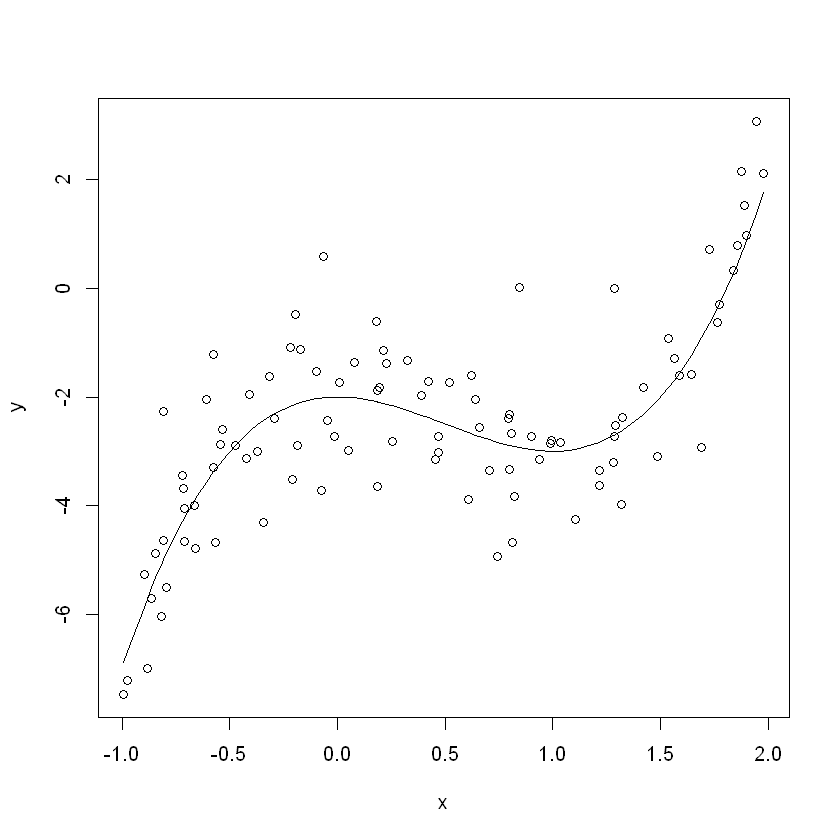

In [34]:
set.seed(2018)
n=100
x = sort (runif (n,-1,2))
mu = -2 -3*x^2 +2 *x^3
y = mu + rnorm (n)
plot(x,y)
points(x,mu,type='l')

Now we try to use different methods to select the model.

In [52]:
cv <- function(x, y, degree, folds)
{
n = length(x)
yhat <- rep(0, n)
foldID <- (rep(0, n) + 1:folds)[sample(n)]
for(v in 1:folds) {
ind <- (1:n)[foldID == v]
x.train <- x[-ind]; x.test <- x[ind]
y.train <- y[-ind]; y.test <- y[ind]
fit <- lm(y.train ~ poly(x.train, degree=degree) )
new <- data.frame(x.in = seq(-3, 3, by=0.1))
yhat[ind]<- predict(fit, newdata=data.frame(x.train = x.test))
}
# the squared error:
return(sum((y-yhat)^2))
}


[1] 7

[1] 3

[1] 3

[1] 3

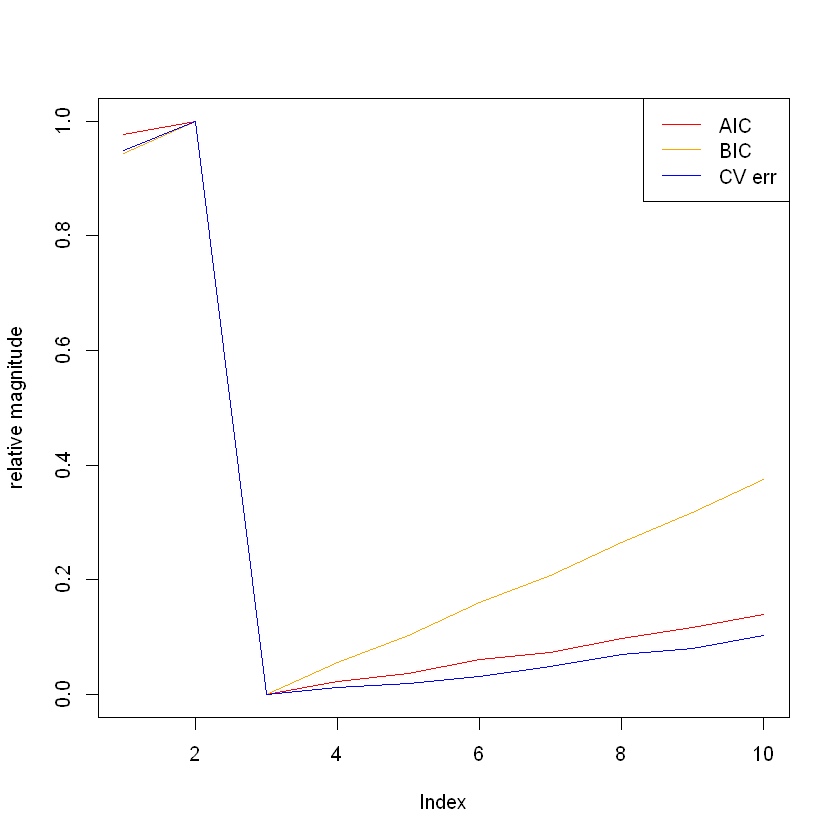

In [53]:
shape <- function(x){(x-min(x))/(max(x)-min(x))}
AICs <- BICs <- CVerr <- rep(0, 10)
for (degree in 1:10){
fit <- lm(y ~ poly(x, degree))
AICs[degree] = AIC(fit)
BICs[degree] = BIC(fit)
CVerr[degree] = cv(x, y, degree, folds=n)
}
7
plot(shape(AICs), type='l', col='red', ylab='relative magnitude')
points(shape(BICs), type='l', col='orange')
points(shape(CVerr), type='l', col='blue')
legend('topright', c('AIC','BIC','CV err'), lty=1, col=c('red','orange','blue'))
which.min(AICs)
which.min(BICs)
which.min(CVerr)
